#GitHub Link: https://github.com/garcimat/EE399 

##Question 2:#

####(i) Write a code to find the minimum error and determine the parameters A, B, C, D

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

x = np.arange(0, 31)
y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41, 40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

def model(x, A, B, C, D):
    return A * np.cos(B * x) + C * x + D

# initial guesses for parameters A, B, C, D
init_guess = [1, 1, 1, 1]

# fit the model to the data with least-squares error
params, _ = curve_fit(model, x, y, init_guess)

# unpack the parameters
A, B, C, D = params

# compute the minimum error
n = len(x)
error = np.sqrt(np.sum((model(x, A, B, C, D) - y) ** 2) / n)

print("A:", A, ", B:", B, ", C:", C, ", D:", D)
print("Minimum error:", error)

A: 2.1717269828948855 , B: 0.909325796914226 , C: 0.7324885143513572 , D: 31.452772437053802
Minimum error: 1.5927258503103892


####(ii) With the results of (i), fix two of the parameters and sweep through values of the other two parameters to generate a 2D loss (error) landscape. Do all combinations of two fixed parameters and two swept parameters. You can use something like pcolor to visualize the results in a grid. How many minima can you find as you sweep through parameters?

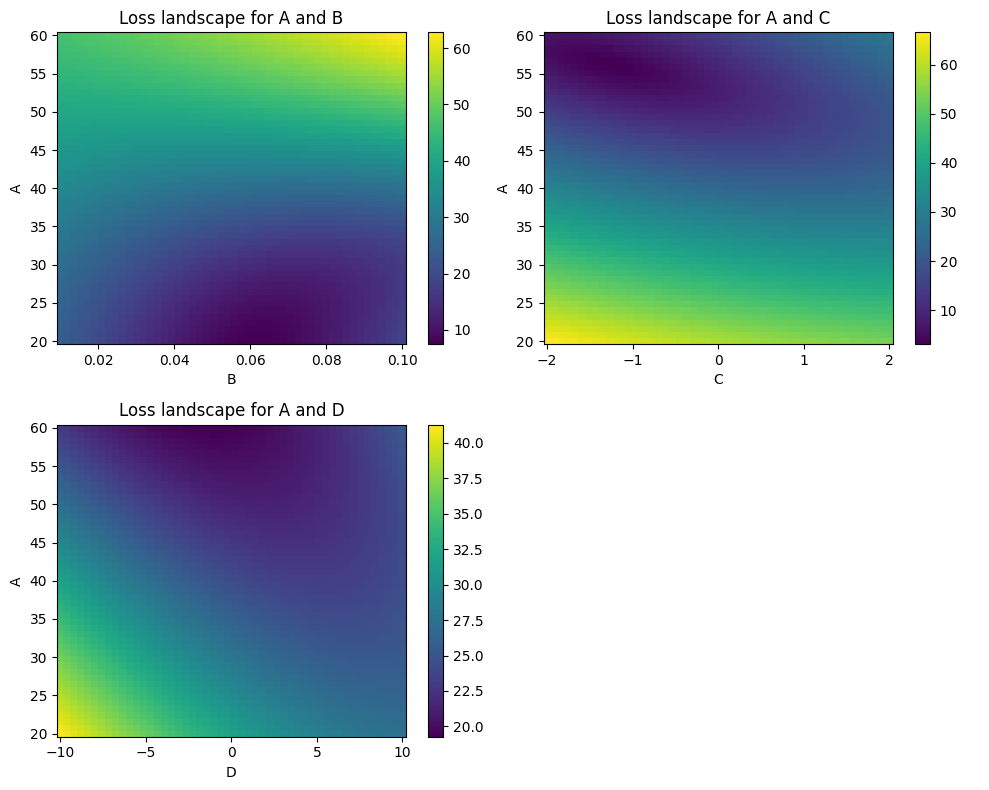

In [2]:
def loss(A, B, C, D, x=x, y=y):
    y_pred = model(x, A, B, C, D)
    return np.sqrt(np.mean((y_pred - y)**2))

# Sweep through values of A and B
A_vals = np.linspace(20, 60, 50)
B_vals = np.linspace(0.01, 0.1, 50)
loss_vals_AB = np.zeros((len(A_vals), len(B_vals)))
for i, A in enumerate(A_vals):
    for j, B in enumerate(B_vals):
        loss_vals_AB[i,j] = loss(A, B, 0, 0)

# Sweep through values of A and C
C_vals = np.linspace(-2, 2, 50)
loss_vals_AC = np.zeros((len(A_vals), len(C_vals)))
for i, A in enumerate(A_vals):
    for j, C in enumerate(C_vals):
        loss_vals_AC[i,j] = loss(A, 0.05, C, 0)

# Sweep through values of A and D
D_vals = np.linspace(-10, 10, 50)
loss_vals_AD = np.zeros((len(A_vals), len(D_vals)))
for i, A in enumerate(A_vals):
    for j, D in enumerate(D_vals):
        loss_vals_AD[i,j] = loss(A, 0.05, 0, D)

# Create a grid of subplots to plot the loss landscapes
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot loss landscape for A and B
ax = axes[0, 0]
pcm = ax.pcolor(B_vals, A_vals, loss_vals_AB.T, cmap='viridis')
ax.set_xlabel('B')
ax.set_ylabel('A')
ax.set_title('Loss landscape for A and B')
fig.colorbar(pcm, ax=ax)

# Plot loss landscape for A and C
ax = axes[0, 1]
pcm = ax.pcolor(C_vals, A_vals, loss_vals_AC.T, cmap='viridis')
ax.set_xlabel('C')
ax.set_ylabel('A')
ax.set_title('Loss landscape for A and C')
fig.colorbar(pcm, ax=ax)

# Plot loss landscape for A and D
ax = axes[1, 0]
pcm = ax.pcolor(D_vals, A_vals, loss_vals_AD.T, cmap='viridis')
ax.set_xlabel('D')
ax.set_ylabel('A')
ax.set_title('Loss landscape for A and D')
fig.colorbar(pcm, ax=ax)

# Hide the bottom right subplot
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

####(iii) Using the first 20 data points as training data, fit a line, parabola and 19th degree polynomial to the data. Compute the least-square error for each of these over the training points. Then compute the least square error of these models on the test data which are the remaining 10 data points.

In [3]:
# fit a line to the first 20 data points
p1 = np.polyfit(x[:20], y[:20], 1)
error1_train = np.sqrt(np.sum((np.polyval(p1, x[:20]) - y[:20]) ** 2) / 20)
error1_test = np.sqrt(np.sum((np.polyval(p1, x[20:]) - y[20:]) ** 2) / 10)

# fit a parabola to the first 20 data points
p2 = np.polyfit(x[:20], y[:20], 2)
error2_train = np.sqrt(np.sum((np.polyval(p2, x[:20]) - y[:20]) ** 2) / 20)
error2_test = np.sqrt(np.sum((np.polyval(p2, x[20:]) - y[20:]) ** 2) / 10)

# fit a 19th degree polynomial to the first 20 data points
p19 = np.polyfit(x[:20], y[:20], 19)
error19_train = np.sqrt(np.sum((np.polyval(p19, x[:20]) - y[:20]) ** 2) / 20)
error19_test = np.sqrt(np.sum((np.polyval(p19, x[20:]) - y[20:]) ** 2) / 10)

print('Training errors:')
print('Line:', error1_train)
print('Parabola:', error2_train)
print('19th degree polynomial:', error19_train)
print()
print('Test errors:')
print('Line:', error1_test)
print('Parabola:', error2_test)
print('19th degree polynomial:', error19_test)

Training errors:
Line: 2.242749386808539
Parabola: 2.125539348277377
19th degree polynomial: 0.02835144302630829

Test errors:
Line: 3.5278140684148744
Parabola: 9.13895508870405
19th degree polynomial: 30023572038.45924


/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


####(iv) Repeat (iii) but use the first 10 and last 10 data points as training data. Then fit the model to the test data (which are the 10 held out middle data points). Compare these results to (iii)

In [4]:
# fit a line to the first 10 and last 10 data points
p1_2 = np.polyfit(np.concatenate((x[:10], x[20:])), np.concatenate((y[:10], y[20:])), 1)
error1_2_test = np.sqrt(np.sum((np.polyval(p1_2, x[10:20]) - y[10:20]) ** 2) / 10)

# fit a parabola to the first 10 and last 10 data points
p2_2 = np.polyfit(np.concatenate((x[:10], x[20:])), np.concatenate((y[:10], y[20:])), 2)
error2_2_test = np.sqrt(np.sum((np.polyval(p2_2, x[10:20]) - y[10:20]) ** 2) / 10)

# fit a 19th degree polynomial to the first 10 and last 10 data points
p19_2 = np.polyfit(np.concatenate((x[:10], x[20:])), np.concatenate((y[:10], y[20:])), 19)
error19_2_test = np.sqrt(np.sum((np.polyval(p19_2, x[10:20]) - y[10:20]) ** 2) / 10)

print('Test errors:')
print('Line:', error1_2_test)
print('Parabola:', error2_2_test)
print('19th degree polynomial:', error19_2_test)

Test errors:
Line: 2.948751607976003
Parabola: 2.9353026962885598
19th degree polynomial: 81.9285731445318


/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
